In [ ]:
import yfinance as yf

# TSLA 옵션 데이터를 가져오기
ticker = "TSLA"
tsla = yf.Ticker(ticker)

# 현재 옵션 만기일 가져오기
expiry_dates = tsla.options
expiry = expiry_dates[1]  # 가장 가까운 만기일 선택

# 옵션 체인 가져오기
option_chain = tsla.option_chain(expiry)
calls = option_chain.calls
puts = option_chain.puts

# 현재 TSLA 주가 가져오기
current_price = tsla.history().tail(1)['Close'].iloc[0]

# 현재 주가와 가장 가까운 행사가격 선택
strike_price = calls.iloc[(calls['strike'] - current_price).abs().argsort()[:1]]['strike'].values[0]

# 해당 행사가격의 콜옵션과 풋옵션 데이터 가져오기
call_option = calls[calls['strike'] == strike_price].iloc[0]
put_option = puts[puts['strike'] == strike_price].iloc[0]

# 옵션 프리미엄 계산
call_premium = call_option['lastPrice']
put_premium = put_option['lastPrice']
total_premium = call_premium + put_premium

# 결과 출력
print(f"현재 TSLA 주가: {current_price}")
print(f"선택된 만기: {expiry}")
print(f"선택된 행사가격: {strike_price}")
print(f"콜옵션 프리미엄: {call_premium}")
print(f"풋옵션 프리미엄: {put_premium}")
print(f"총 프리미엄: {total_premium}")


현재 TSLA 주가: 337.79998779296875
선택된 만기: 2025-03-07
선택된 행사가격: 340.0
콜옵션 프리미엄: 12.47
풋옵션 프리미엄: 14.25
총 프리미엄: 26.72


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

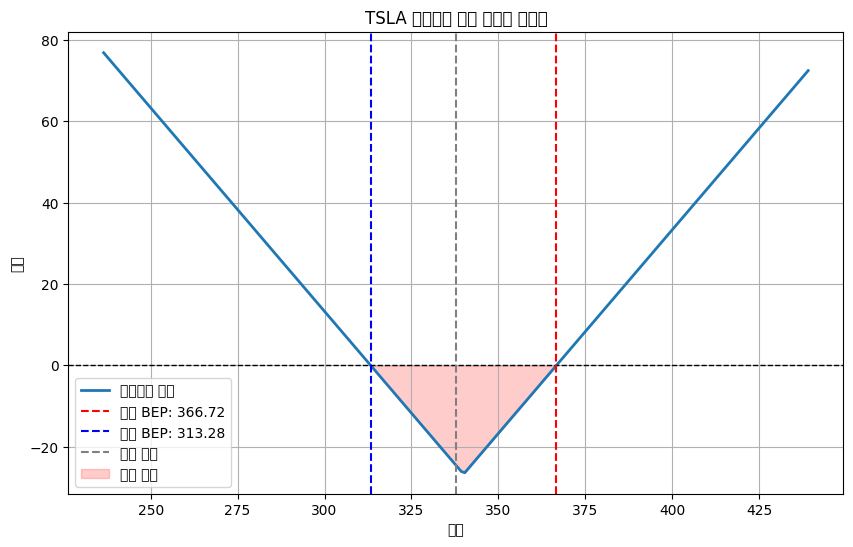

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 변수 설정
strike_price = strike_price  # 행사가격
premium = total_premium  # 총 프리미엄 (콜 + 풋 옵션)
current_price = current_price  # 현재 주가

# 손익분기점 계산
bep_high = strike_price + premium  # 상승 BEP
bep_low = strike_price - premium  # 하락 BEP

# 주가 범위 설정
price_range = np.linspace(current_price * 0.7, current_price * 1.3, 200)

# 각 주가에서의 실제 수익 계산 (프리미엄 반영)
profit = (np.maximum(price_range - strike_price, 0) + np.maximum(strike_price - price_range, 0)) - premium

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(price_range, profit, label='스트래들 수익', linewidth=2)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(bep_high, color='red', linestyle='--', label=f'상승 BEP: {bep_high}')
plt.axvline(bep_low, color='blue', linestyle='--', label=f'하락 BEP: {bep_low}')
plt.axvline(current_price, color='gray', linestyle='--', label='현재 주가')

# 손실 구간 음영 처리
plt.fill_between(price_range, profit, where=((price_range > bep_low) & (price_range < bep_high)), color='red', alpha=0.2, label="손실 구간")

# 그래프 설정
plt.title('TSLA 스트래들 전략 수익률 그래프')
plt.xlabel('주가')
plt.ylabel('수익')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from datetime import datetime

# 현재 날짜 및 시간
now = datetime.now()

# datetime 객체로 변환
expiry_date = datetime.strptime(expiry, "%Y-%m-%d")

import yfinance as yf
import numpy as np

money = current_price
print("current money : ", money)
print("current price : ", current_price)
print("total_premium_maxLoss : ", total_premium)
print("max_loss_precent :", total_premium / current_price * 100 , "%")
print()
print()
print()
print("during : ", expiry_date - now)

print("have to pass precent :", bep_high / current_price * 100 , "%")
print("have to pass money :", bep_high)

print("not moving Profit:", bep_high / current_price * 100)
moveP = 0.05
profit_moving_P = np.maximum(current_price * (1 + moveP)-strike_price, 0) + np.maximum(strike_price - current_price * (1 + moveP), 0) - premium
print("moving 5 precent :", profit_moving_P / current_price * 100, "%")
moveP = 0.07
profit_moving_P = np.maximum(current_price * (1 + moveP)-strike_price, 0) + np.maximum(strike_price - current_price * (1 + moveP), 0) - premium
print("moving 7 precent :", profit_moving_P / current_price * 100, "%")
moveP = 0.1
profit_moving_P = np.maximum(current_price * (1 + moveP)-strike_price, 0) + np.maximum(strike_price - current_price * (1 + moveP), 0) - premium
print("moving 10 precent :", profit_moving_P / current_price * 100, "%")
moveP = 0.12
profit_moving_P = np.maximum(current_price * (1 + moveP)-strike_price, 0) + np.maximum(strike_price - current_price * (1 + moveP), 0) - premium
print("moving 12 precent :", profit_moving_P / current_price * 100, "%")

current money :  337.79998779296875
current price :  337.79998779296875
total_premium_maxLoss :  26.72
max_loss_precent : 7.9100062065059 %



during :  12 days, 23:22:52.166847
have to pass precent : 108.56128278629656 %
have to pass money : 366.72
not moving Profit: 108.56128278629656
moving 5 precent : -3.5612827862965406 %
moving 7 precent : -1.561282786296527 %
moving 10 precent : 1.4387172137034763 %
moving 12 precent : 3.438717213703473 %


In [ ]:
expiry

'2025-03-07'